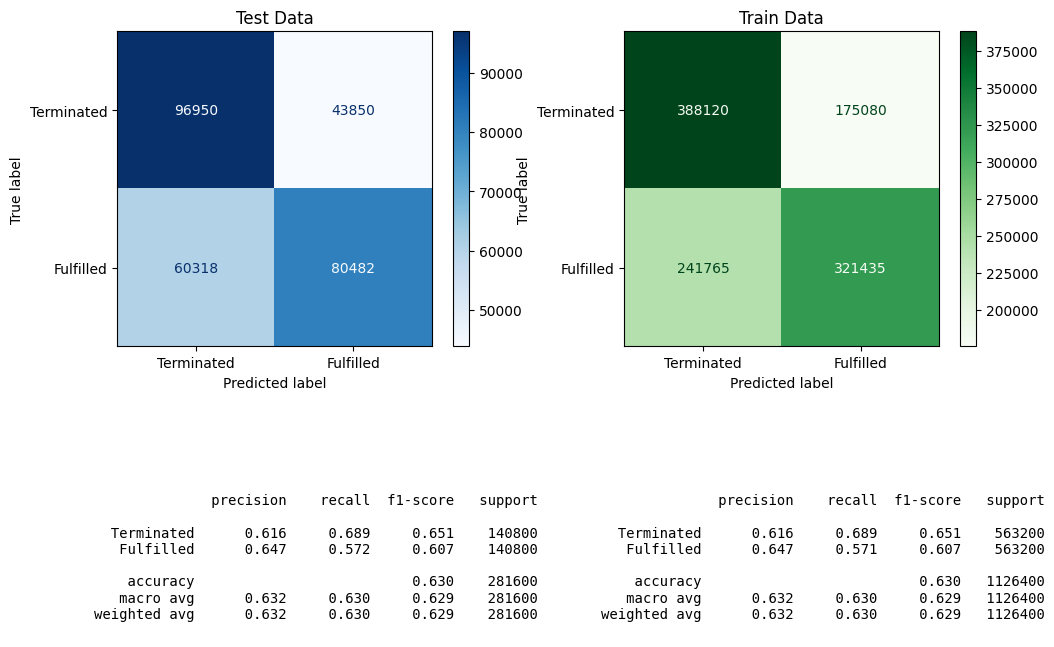

In [5]:
# stuff for MLFlow
%matplotlib inline
import sys

import mlflow.xgboost
sys.path.append('../modeling')
from config import TRACKING_URI
import optuna
import mlflow

# set the experiment id
mlflow.set_tracking_uri(TRACKING_URI)
# mlflow.autolog()

run_id = 'da46f2fc452b4efa979b5ca28e23f992'
model = mlflow.xgboost.load_model(f'runs:/{run_id}/model')

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
SEED = 42

df = pd.read_csv('../data/synth_combined_add_features.csv', index_col=0)
col_target = 'dropped_out'
X = df.drop(col_target, axis=1)
# MLFlow doesn't like a series for the target, so convert it to numpy - for sklearn it doesn't matter
y = df[col_target].to_numpy()

# some of the models need to encode the categorical features
cat_columns = X.select_dtypes(include=['object']).columns.tolist()
num_columns = [col for col in X.columns if col not in cat_columns]
# MLFlow complains about ints, because it can't contain nan - we don't have nans, but the warning is annoying and it doesn't matter for our models
int_columns = X.select_dtypes(include=['int']).columns
X[int_columns] = X[int_columns].astype(float)
X[cat_columns] = X[cat_columns].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

from utils import check_classification_binary
check_classification_binary(model, X_train, X_test, y_train, y_test)
